In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sp


def a(x):
    if task == 1:
        return 1
    elif task == 2:
        return np.sin(var)
    elif task == 3:
        return np.sin(var*x)


def b(x):
    if task == 1:
        return 1
    elif task == 2:
        return np.cos(var)
    elif task == 3:
        return np.cos(var*x)


def q(x):
    return 1+b(x)*x**2


def fi(x, i):
    if i == 0:
        return 0
    return (1-x**2)*x**(i-1)


def diff2fi(x, i):
    if i == 0:
        return 0
    elif i == 1:
        return -2
    elif i == 2:
        return -6*x
    else:
        return (i-1)*(i-2)*x**(i-3)-i*(i+1)*x**(i-1)

    
def y(x, a_list):
    sum = 0
    for a, i in zip(a_list, range(1, len(a_list)+1)):
        sum += a * fi(x, i)
    return sum


A = -1
B = 1
task = 1
var = 4

In [2]:
def c1(x):
    return -1 - a(x) * diff2fi(x, 0) - q(x) * fi(x, 0)


def k1(x, i):
    return a(x) * diff2fi(x, i) + q(x) * fi(x, i)

## Метод коллокаций

Имеем следующую краевую задачу

$ay'' - q(x)y = f(x)$

Базисные функции заданы следующей формулой:

$\phi_i(x) = x^i\cdot(1-x^2), i \in [0, n]$

По базисным функциям построим приближённое решение:

$y_n(x)=\phi_0(x)+a_1\phi_1(x)+...+a_n\phi_n(x)$

Составим невязку:

$\Psi(x, a_1,..., a_n)=ay_n''(x)+q(x)y_n(x)-f(x)$

На отрезке $[a, b]$ выберем точки $x_1,...,x_m \in [a, b] (m \ge n)$

Считая, что невязка должна быть нулю в точках коллокации, получим следующую систему для определения коэффициентов $a_1,...,a_n.$

$ \begin{cases}
      \Psi(x_1, a_1,..., a_n)=0,\\
      .....................\\
      \Psi(x_m, a_1,..., a_n)=0.
  \end{cases} $

Для решения данной системы, составим матрицу из коэффициентов при $a_1,...,a_n.$

Коэффициент при $a_j$ в $i$-ой строке выражается следующей формулой:

$ k_{ij}=a(x_i)\phi_j''(x_i) + q(x_i)\phi_j(x_i)$

Свободный член $i$-ой строки выражается следующей формулой:

$ c_i=-1 - a(x_i)\phi_0''(x_i) - q(x_i) \phi_0(x_i)$

В результате решения системы получим коэффициенты $a_1,...,a_n.$

Подставим их в приближённое решение и получим ответ.

Wall time: 327 ms


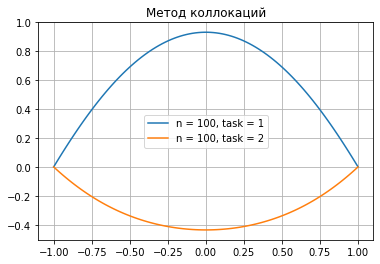

In [3]:
%%time
n = 100
for task in [1, 2]:
    x_list = np.linspace(A, B, n + 2)

    matrix = []
    vector = []

    for x in x_list[1:-1:]:
        row = []
        if n % 2 == 1:
            for i in range(1, n):
                row.append(k1(x, i))
        else:
            for i in range(1, n+1):
                row.append(k1(x, i))
        matrix.append(row)
        vector.append(c1(x))

    matrix = np.matrix(matrix, dtype='float')
    vector = np.array(vector, dtype='float')

    if n % 2 == 1:
        a_list = np.linalg.solve(matrix[:-1:], vector[:-1:])
    else:
        a_list = np.linalg.solve(matrix, vector)

    result1 = []
    for x in x_list[1:-1:]:
        result1.append(y(x, a_list))
    result1.insert(0, 0)
    result1.append(0)
    
    plt.plot(x_list, result1, label = "n = %d, task = %d" % (n, task))
plt.title("Метод коллокаций")
plt.legend()
plt.grid()

In [4]:
def c2(x_list, i):
    sum = 0
    for x in x_list:
        sum += (a(x) * diff2fi(x, i) + q(x) * fi(x, i)) * (a(x) * diff2fi(x, 0) + q(x) * fi(x, 0) + 1)
    return -2*sum


def k2(x_list, i, j):
    sum = 0
    for x in x_list:
        sum += (a(x) * diff2fi(x, j) + q(x) * fi(x, j)) * (a(x) * diff2fi(x, i) + q(x) * fi(x, i))
    return 2*sum

## Метод наименьших квадратов

Имеем следующую краевую задачу

$ay'' - q(x)y = f(x)$

Базисные функции заданы следующей формулой:

$\phi_i(x) = x^i\cdot(1-x^2), i \in [0, n]$

По базисным функциям построим приближённое решение:

$y_n(x)=\phi_0(x)+a_1\phi_1(x)+...+a_n\phi_n(x)$

Составим невязку:

$\Psi(x, a_1,..., a_n)=ay_n''(x)+q(x)y_n(x)-f(x)$

Выберем $N \gt n$ точек и решим задачу

$S=\sum\limits_{k=1}^N\Psi^2(x_k, a_1,...,a_n) \rightarrow min.$

Для её решения строится система

$ \begin{cases}
      \frac{\partial S}{\partial a_1}=0,\\
      .........\\
      \frac{\partial S}{\partial a_n}=0.
  \end{cases} $
  
Для решения данной системы, составим матрицу из коэффициентов при $a_1,...,a_n.$

Коэффициент при $a_j$ в $i$-ой строке выражается следующей формулой:

$ k_{ij} = 2\cdot\sum\limits_{k=1}^N (a(x)\phi_i''(x_k) + q(x)\phi_i(x_k)) \cdot(a(x)\phi_j''(x_k) + q(x_k)\phi_j(x_k))$

Свободный член $i$-ой строки выражается следующей формулой:

$ c_i= -2\cdot\sum\limits_{k=1}^N (a(x)\phi_i''(x_k) + q(x) \phi_i(x_k))\cdot(a(x)\phi_0''(x_k) + q(x)\phi_0(x_k) + 1)$

В результате решения системы получим коэффициенты $a_1,...,a_n.$

Подставим их в приближённое решение и получим ответ. 

Wall time: 18.7 s


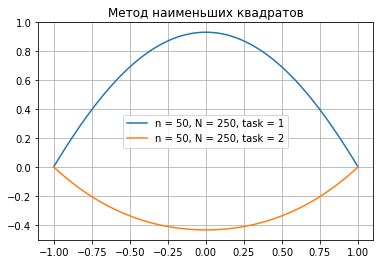

In [5]:
%%time
n = 50
N = 5*n
for task in [1, 2]:
    x_list_2 = np.linspace(A, B, N + 2)[1:-1:]

    matrix = []
    vector = []

    for j in range(1, n + 1):
        row = []
        for i in range(1, n + 1):
            row.append(k2(x_list_2, i, j))
        vector.append(c2(x_list_2, j))
        matrix.append(row)

    matrix = np.matrix(matrix, dtype='float')
    vector = np.array(vector, dtype='float')

    a_list = np.linalg.solve(matrix, vector)

    result2 = []
    for x in x_list[1:-1:]:
        result2.append(y(x, a_list))

    result2.insert(0, 0)
    result2.append(0)

    plt.plot(x_list, result2, label = "n = %d, N = %d, task = %d" % (n, N, task))
plt.title("Метод наименьших квадратов")
plt.legend()
plt.grid()

In [10]:
def integ(func, i, j, a, b):
    def f(x):
        return func(x, i, j)
    return sp.quad(f, a, b)[0]


def a_fi_diff2fi(x, i, j):
    return a(x) * fi(x, i) * diff2fi(x, j)


def q_fi_fi(x, i, j):
    return q(x) * fi(x, i) * fi(x, j)


def fi_(x, i, _):
    if i == 0:
        return 0
    return (1-x**2)*x**(i-1)

## Метод Галёркина

Имеем следующую краевую задачу

$ay'' - q(x)y = f(x)$

Базисные функции заданы следующей формулой:

$\phi_i(x) = x^i\cdot(1-x^2), i \in [0, n]$

По базисным функциям построим приближённое решение:

$y_n(x)=\phi_0(x)+a_1\phi_1(x)+...+a_n\phi_n(x)$

Составим невязку:

$\Psi(x, a_1,..., a_n)=ay_n''(x)+q(x)y_n(x)-f(x)$

Составим систему:

$ \begin{cases}
      \int\limits_a^b \Psi(x, a_1,...,a_n)\phi_1(x)dx=0,\\
      .........\\
      \int\limits_a^b \Psi(x, a_1,...,a_n)\phi_n(x)dx=0.
  \end{cases} $
  
Для решения данной системы, составим матрицу из коэффициентов при $a_1,...,a_n.$

Коэффициент при $a_j$ в $i$-ой строке выражается следующей формулой:

$ k_{ij} = \int\limits_a^b a(x)\phi_i(x)\phi_j''(x) dx + \int\limits_a^b q(x)\phi_i(x)\phi_j(x) dx$

Свободный член $i$-ой строки выражается следующей формулой:

$ c_i= - (\int\limits_a^b a(x)\phi_i(x)\phi_0''(x) dx + \int\limits_a^b q(x)\phi_i(x)\phi_0(x) dx + \int\limits_a^b \phi_i(x) dx)$

В результате решения системы получим коэффициенты $a_1,...,a_n.$

Подставим их в приближённое решение и получим ответ. 

Wall time: 19.7 s


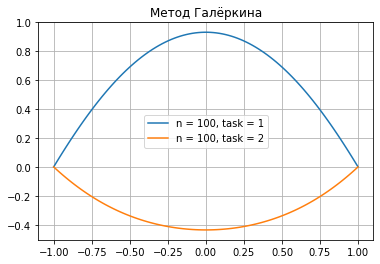

In [9]:
%%time
n = 100
for task in [1, 2]:
    matrix = []
    vector = []

    for i in range(1, n + 1):
        row = []
        for j in range(1, n + 1):
            row.append(integ(a_fi_diff2fi, i, j, A, B) + integ(q_fi_fi, i, j, A, B))
        vector.append(-(integ(a_fi_diff2fi, i, 0, A, B) + integ(q_fi_fi, i, 0, A, B) + integ(fi_, i, 0, A, B)))
        matrix.append(row)

    matrix = np.matrix(matrix, dtype='float')
    vector = np.array(vector, dtype='float')

    a_list = np.linalg.solve(matrix, vector)

    result3 = []
    for x in x_list[1:-1:]:
        result3.append(y(x, a_list))

    result3.insert(0, 0)
    result3.append(0)

    plt.plot(x_list, result3, label = "n = %d, task = %d" % (n, task))
plt.title("Метод Галёркина")
plt.legend()
plt.grid()